# CalCOFI


# List of content
## Background
- About Dataset
- What are we going to do?

## Import tools

## Exploratory Data Analysis (EDA)
- Data Collection
- Understanding the Data
- Cleaning the Data
- Indentify Correlated Variables

## Advanced EDA Techniques
- Mutual Information
- Pricipal Component Analysis (PCA)

## Data Preprocessing

## Models Selection

### Linear
  - Simple Linear Regression
  - Multiple Linear Regression
  - Polynomial Linear Regression
  - Support Vector Machine Regression

### Non-Linear
  - Decision Tree Regression
  - Random Forest Regression

# Background

## About dataset

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

Source: https://www.kaggle.com/datasets/sohier/calcofi/data?select=bottle.csv

## What are we going to do?

We're going to predict the salinity of salt per water based on the data (I still don't know which columns yet).

# Import Tools

In [278]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Exploratory Data Analysis (EDA)



## Data Collection

In [2]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sohier/calcofi


  0%|          | 0.00/50.4M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.4M [00:01<00:54, 956kB/s]
  4%|3         | 2.00M/50.4M [00:01<00:26, 1.91MB/s]
  8%|7         | 4.00M/50.4M [00:01<00:12, 3.92MB/s]
 12%|#1        | 6.00M/50.4M [00:01<00:07, 5.83MB/s]
 16%|#5        | 8.00M/50.4M [00:01<00:05, 7.52MB/s]
 20%|#9        | 10.0M/50.4M [00:01<00:04, 9.08MB/s]
 24%|##3       | 12.0M/50.4M [00:02<00:03, 10.2MB/s]
 28%|##7       | 14.0M/50.4M [00:02<00:03, 10.9MB/s]
 32%|###1      | 16.0M/50.4M [00:02<00:03, 11.4MB/s]
 36%|###5      | 18.0M/50.4M [00:02<00:02, 11.8MB/s]
 40%|###9      | 20.0M/50.4M [00:02<00:02, 12.8MB/s]
 44%|####3     | 22.0M/50.4M [00:02<00:02, 13.5MB/s]
 48%|####7     | 24.0M/50.4M [00:02<00:01, 14.2MB/s]
 52%|#####1    | 26.0M/50.4M [00:03<00:01, 13.2MB/s]
 56%|#####5    | 28.0M/50.4M [00:03<00:01, 13.3MB/s]
 59%|#####9    | 30.0M/50.4M [00:03<00:01, 13.7MB/s]
 63%|######3   | 32.0M/50.4M [00:03<00:01, 14.4MB/s]
 67%|######7   | 34.0M/50.4M [00:03<00:01, 14.9MB/s]
 7

In [4]:
# !unzip calcofi.zip
!tar -xf calcofi.zip

In [5]:
# !ls
!dir

 Volume in drive C is Windows
 Volume Serial Number is E2E8-DD6A

 Directory of C:\Users\USER\Downloads\ml-journey\Datasets\Others

12/28/2023  10:01 AM    <DIR>          .
12/28/2023  10:01 AM    <DIR>          ..
12/28/2023  09:43 AM    <DIR>          .ipynb_checkpoints
09/21/2019  12:17 AM       257,414,189 bottle.csv
09/21/2019  12:17 AM        52,872,856 calcofi.zip
09/21/2019  12:17 AM        12,065,734 cast.csv
12/28/2023  09:59 AM           957,270 Untitled3.ipynb
               4 File(s)    323,310,049 bytes
               3 Dir(s)  167,165,915,136 bytes free


In [134]:
orig_df = pd.read_csv("bottle.csv", low_memory=False)
df = orig_df.copy()
df.iloc[:5, :]

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understand the Data

In [135]:
df.shape

(864863, 74)

In [136]:
for column in df.columns:
  missing_count = df[column].isnull().sum()
  print(f"Column: {column}, Missing Value: {missing_count}")

Column: Cst_Cnt, Missing Value: 0
Column: Btl_Cnt, Missing Value: 0
Column: Sta_ID, Missing Value: 0
Column: Depth_ID, Missing Value: 0
Column: Depthm, Missing Value: 0
Column: T_degC, Missing Value: 10963
Column: Salnty, Missing Value: 47354
Column: O2ml_L, Missing Value: 168662
Column: STheta, Missing Value: 52689
Column: O2Sat, Missing Value: 203589
Column: Oxy_µmol/Kg, Missing Value: 203595
Column: BtlNum, Missing Value: 746196
Column: RecInd, Missing Value: 0
Column: T_prec, Missing Value: 10963
Column: T_qual, Missing Value: 841736
Column: S_prec, Missing Value: 47354
Column: S_qual, Missing Value: 789949
Column: P_qual, Missing Value: 191108
Column: O_qual, Missing Value: 680187
Column: SThtaq, Missing Value: 799040
Column: O2Satq, Missing Value: 647066
Column: ChlorA, Missing Value: 639591
Column: Chlqua, Missing Value: 225697
Column: Phaeop, Missing Value: 639592
Column: Phaqua, Missing Value: 225693
Column: PO4uM, Missing Value: 451546
Column: PO4q, Missing Value: 413077
Colu

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [138]:
df.describe() # Numerical data

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [139]:
df.describe(include=['object', 'bool']) # Categorical Data

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0010A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [140]:
for col in df.columns:
  missing_percentage_salt = df[col].isnull().sum() / len(df) * 100
  print(f"Percentage of missing values in {col} column: {missing_percentage_salt:.2f}%")


Percentage of missing values in Cst_Cnt column: 0.00%
Percentage of missing values in Btl_Cnt column: 0.00%
Percentage of missing values in Sta_ID column: 0.00%
Percentage of missing values in Depth_ID column: 0.00%
Percentage of missing values in Depthm column: 0.00%
Percentage of missing values in T_degC column: 1.27%
Percentage of missing values in Salnty column: 5.48%
Percentage of missing values in O2ml_L column: 19.50%
Percentage of missing values in STheta column: 6.09%
Percentage of missing values in O2Sat column: 23.54%
Percentage of missing values in Oxy_µmol/Kg column: 23.54%
Percentage of missing values in BtlNum column: 86.28%
Percentage of missing values in RecInd column: 0.00%
Percentage of missing values in T_prec column: 1.27%
Percentage of missing values in T_qual column: 97.33%
Percentage of missing values in S_prec column: 5.48%
Percentage of missing values in S_qual column: 91.34%
Percentage of missing values in P_qual column: 22.10%
Percentage of missing values in

## Clean the Data

### One Hot Encoding the categorical columns

In [141]:
# categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# one_hot_encoded_data = encoder.fit_transform(df[categorical_columns])
# one_hot_encoded_data

In [142]:
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# df = df.drop(columns=categorical_columns)
# df = pd.concat([df, one_hot_encoded_df], axis=1)
# df.head()

### Drop the categorical columns

In [143]:
df = df.drop(df.select_dtypes(include=['object', 'category']).columns, axis=1)
df.shape

(864863, 70)

### Handle missing values 

#### Drop na based on threshold

In [144]:
threshold = 85 # column with more than 85% NAN will be drop
non_na_df = df.dropna(thresh=len(salnty_non_na) * threshold / 100, axis=1) # axis 1 for droping the columns
non_na_df.shape

(864863, 24)

#### Mean imnputation

In [145]:
for column in non_na_df.columns:
    non_na_df.loc[:, column].fillna(non_na_df.loc[:, column].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_3112\966211858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_df.loc[:, column].fillna(non_na_df.loc[:, column].mean(), inplace=True)


In [146]:
non_na_df = non_na_df.drop_duplicates()
non_na_df.shape

(864863, 24)

### Remove the outlier in each columns

In [147]:
Q1 = non_na_df.quantile(0.25)
Q3 = non_na_df.quantile(0.75)
IQR = Q3 - Q1
IQR[:5]

Cst_Cnt     18288.000
Btl_Cnt    432431.000
Depthm        254.000
T_degC          6.110
Salnty          0.676
dtype: float64

In [148]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
non_outlier_df = non_na_df[((non_na_df >= lower_bound) | (non_na_df <= upper_bound)).any(axis=1)]
non_outlier_df.shape

(864863, 24)

### Handling Skewed Data

A skewness value > 1 or < -1 is typically considered highly skewed.

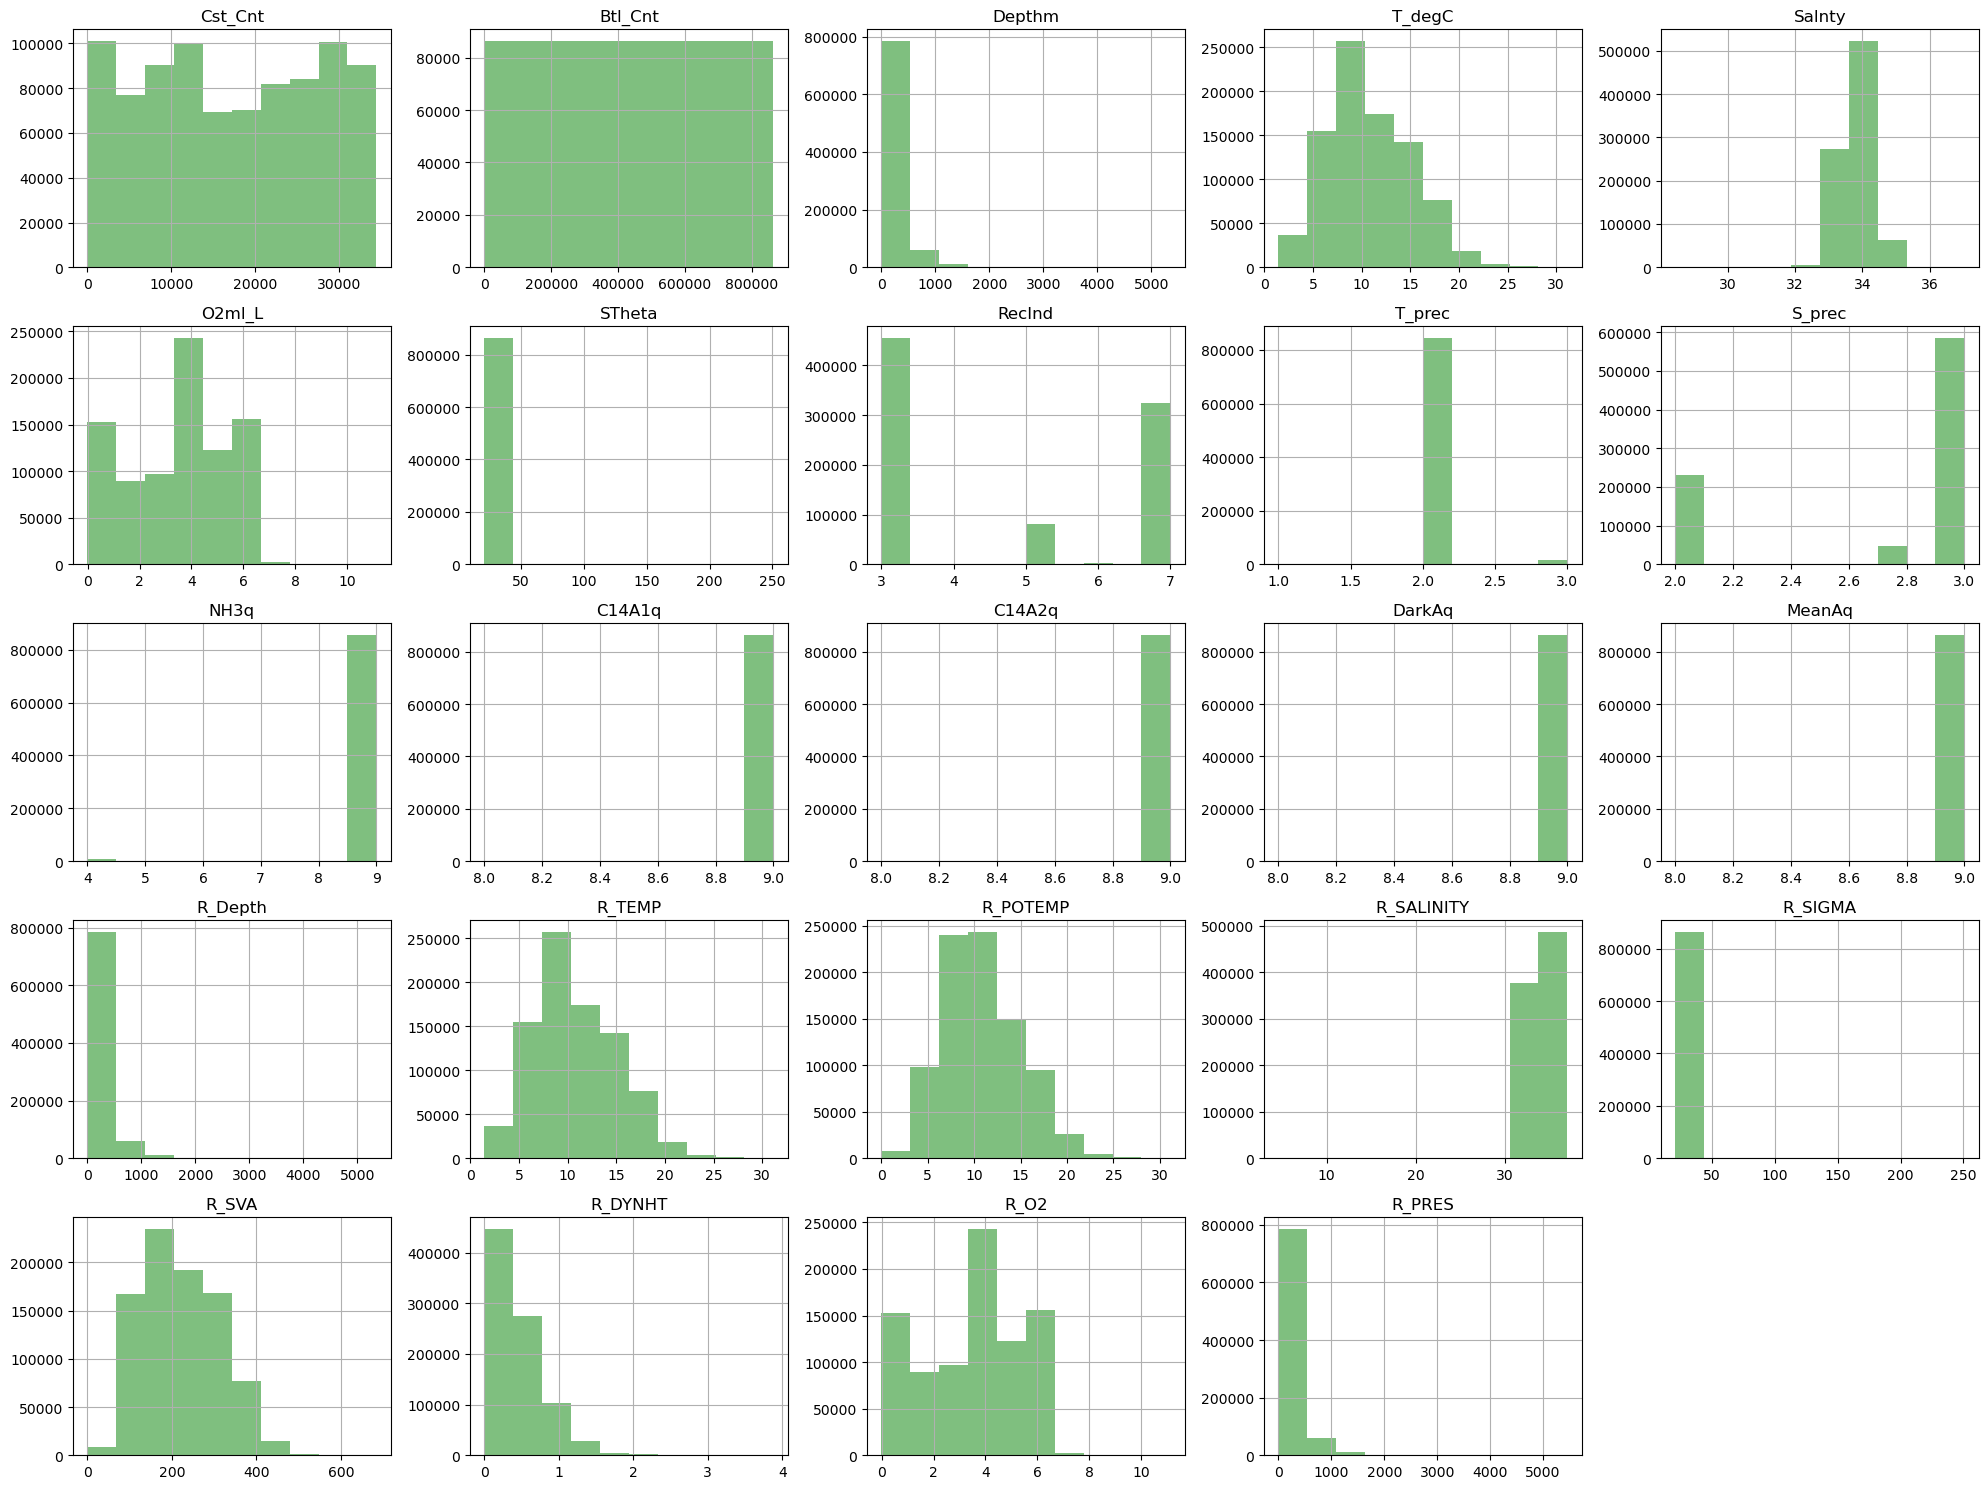

In [149]:
non_outlier_df.hist(figsize=(20, 15), color="green", alpha=0.5)
plt.tight_layout()
plt.show()

### Apply Transformations to the skewed columns

In [171]:
num_transformer = 0
non_skewed_df = non_outlier_df.copy()
qt = QuantileTransformer(output_distribution='normal')

for col in non_skewed_df.select_dtypes(include=[np.number]):
    if non_skewed_df[col].skew() > 1 or non_skewed_df[col].skew() < -1:
        non_skewed_df[col + '_transformed'] = qt.fit_transform(non_skewed_df[[col]])
        num_transformer += 1

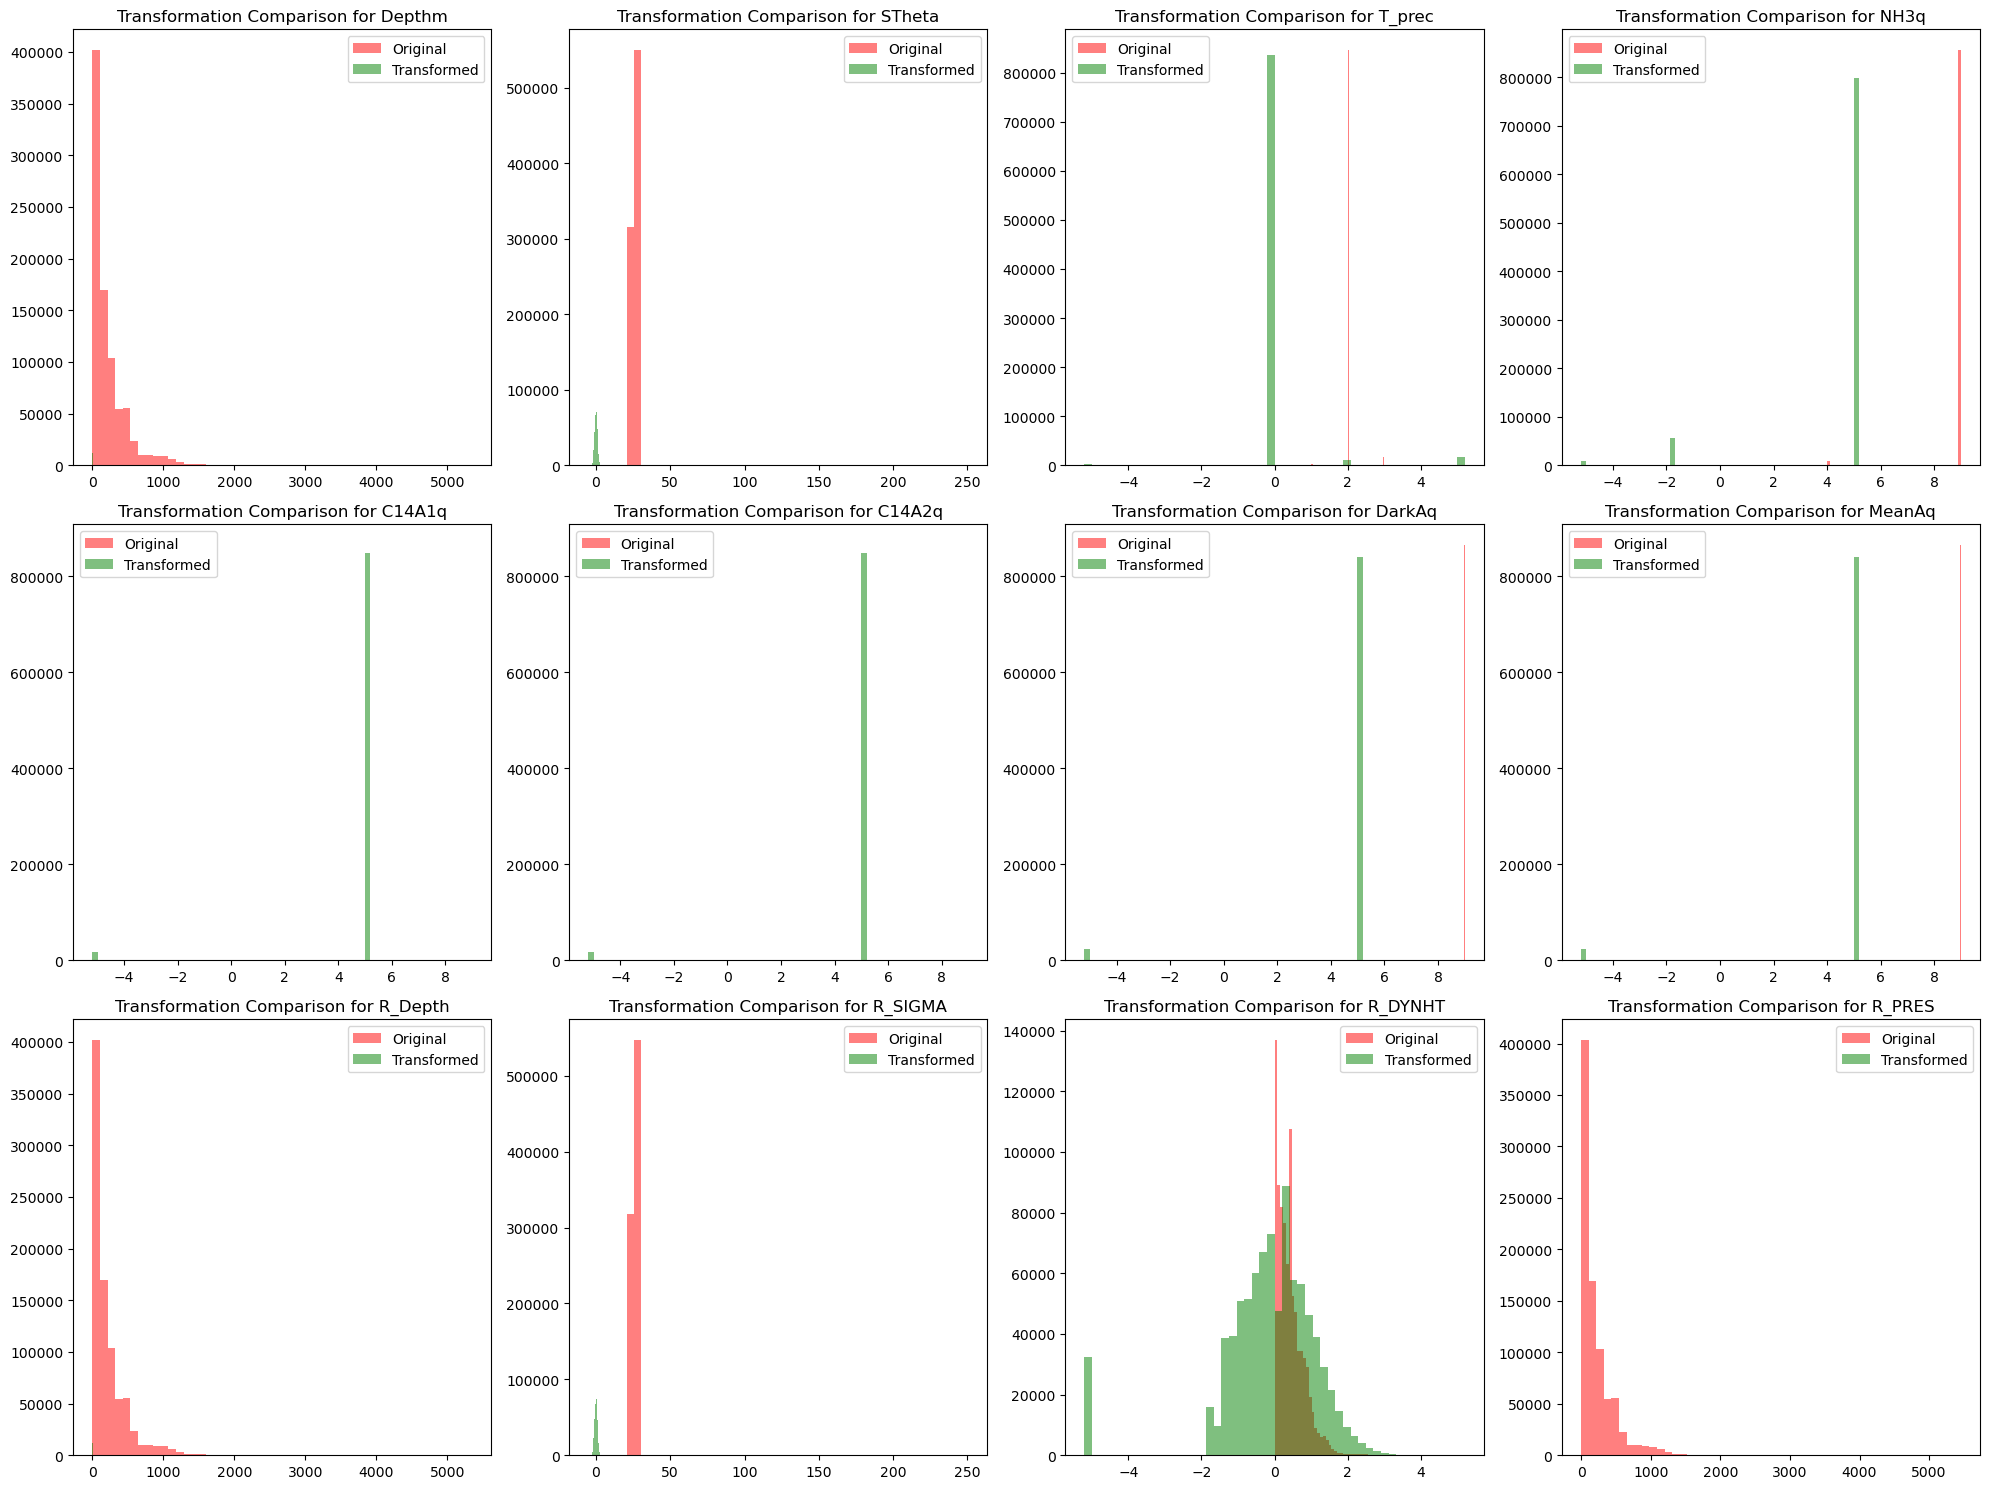

In [172]:
num_rows = math.ceil(num_transformer / 4)
fig = plt.figure(figsize=(20, num_rows * 5))

plot_number = 1
for col in non_skewed_df.columns:
    if col.endswith('_transformed'):
        original_col = col.rsplit('_', 1)[0]

        ax = fig.add_subplot(num_rows, 4, plot_number)
        ax.hist(non_skewed_df[original_col], bins=50, alpha=0.5, label='Original', color='red')
        ax.hist(non_skewed_df[col], bins=50, alpha=0.5, label='Transformed', color='green')
        ax.set_title(f'Transformation Comparison for {original_col}')
        ax.legend()
        non_skewed_df.drop(columns=[original_col]) # Drop the original, use the transformed one.

        plot_number += 1

plt.tight_layout()
plt.show()

## Indentify Correlated Variables

In [173]:
correlation_matrix = non_skewed_df.corr()
correlation_matrix.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,...,T_prec_transformed,NH3q_transformed,C14A1q_transformed,C14A2q_transformed,DarkAq_transformed,MeanAq_transformed,R_Depth_transformed,R_SIGMA_transformed,R_DYNHT_transformed,R_PRES_transformed
Cst_Cnt,1.000000,0.999345,-0.162222,0.088783,-0.189893,0.146288,-0.085748,-0.100142,0.067562,0.439404,...,0.050099,-0.437497,-0.165000,-0.165017,-0.197096,-0.197097,-0.103289,-0.117530,-0.092941,-0.105224
Btl_Cnt,0.999345,1.000000,-0.161617,0.089581,-0.187243,0.144570,-0.085408,-0.100828,0.062489,0.438148,...,0.045066,-0.448370,-0.164510,-0.164535,-0.195778,-0.195779,-0.103312,-0.117296,-0.093263,-0.105240
Depthm,-0.162222,-0.161617,1.000000,-0.678628,0.543326,-0.532769,0.551689,0.082316,0.019348,0.005630,...,0.006119,0.057296,0.078064,0.078004,0.097772,0.097772,0.641053,0.718985,0.605800,0.648647
T_degC,0.088783,0.089581,-0.678628,1.000000,-0.489967,0.712731,-0.804295,-0.066060,-0.041076,-0.034964,...,-0.039438,-0.019875,-0.104545,-0.104565,-0.132348,-0.132353,-0.740437,-0.929162,-0.712198,-0.745304
Salnty,-0.189893,-0.187243,0.543326,-0.489967,1.000000,-0.722056,0.601137,0.065183,-0.018522,-0.079280,...,-0.022934,0.091009,0.120978,0.121044,0.154218,0.154219,0.541611,0.695439,0.555192,0.545300


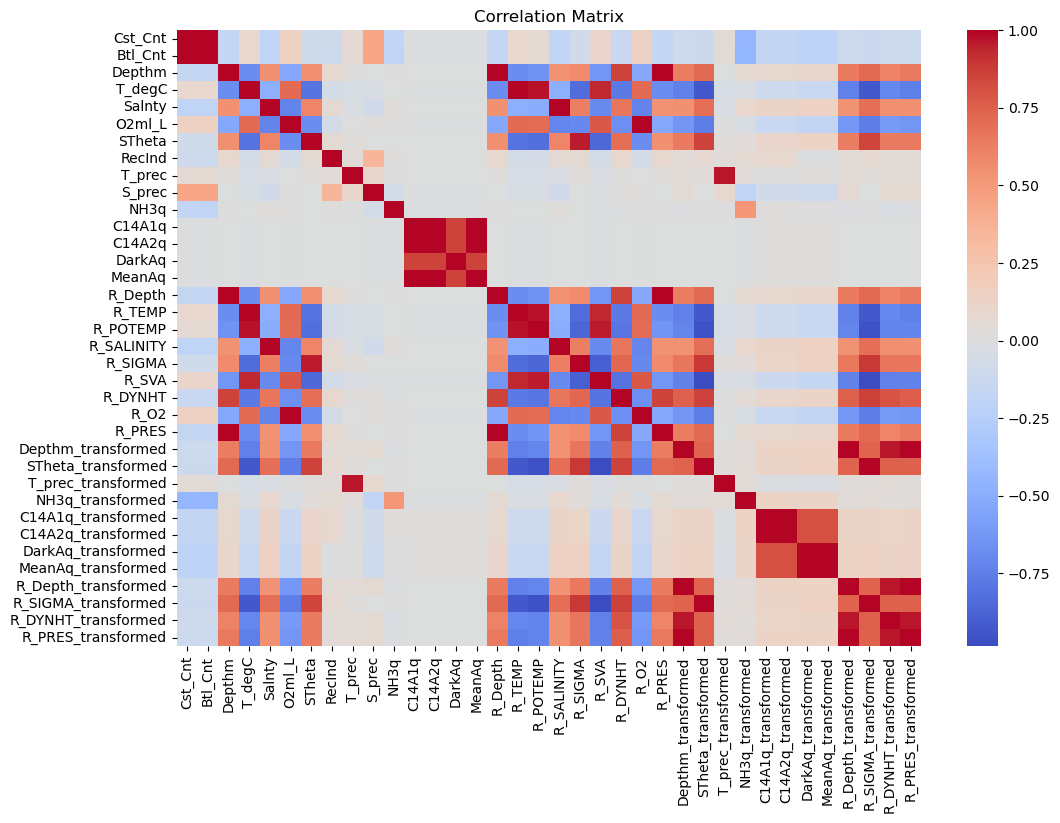

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

It's too messy there, Let's do some filter.

In [187]:
corr_threshold = 0.7

highly_correlated_pairs = [(var, abs(correlation_matrix[var]["Salnty"])) for var in correlation_matrix.columns if abs(correlation_matrix[var]["Salnty"]) > corr_threshold and var != "Salnty"]

print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly correlated pairs:
('O2ml_L', 0.7220557948785186)
('R_SALINITY', 0.9974283339995477)
('R_O2', 0.7220568283319425)


# Advanced EDA Techniques

## Mutual Information

Identifying which features have the strongest relationship with the target variable, regardless of whether that relationship is linear or non-linear.

In [195]:
X = non_skewed_df.copy()
y = non_skewed_df.copy()
X = X.drop(columns=["Salnty"])
y = y[["Salnty"]]
X.shape, y.shape

((864863, 35), (864863, 1))

In [201]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

C:\Users\USER\anaconda3\envs\JTorch\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R_SALINITY             7.009485
R_SIGMA_transformed    1.186725
R_SIGMA                1.174851
STheta_transformed     1.173737
STheta                 1.169749
R_SVA                  1.142765
Btl_Cnt                0.932963
O2ml_L                 0.899226
Cst_Cnt                0.885055
R_O2                   0.883409
R_POTEMP               0.862994
R_PRES_transformed     0.817512
R_PRES                 0.814565
Depthm_transformed     0.778122
R_Depth_transformed    0.777973
R_Depth                0.775423
Depthm                 0.775420
R_DYNHT_transformed    0.770247
R_DYNHT                0.759861
T_degC                 0.744892
R_TEMP                 0.733847
S_prec                 0.590302
RecInd                 0.129417
NH3q                   0.087522
NH3q_transformed       0.087376
T_prec                 0.033354
T_prec_transformed     0.031582
DarkAq_transformed     0.023334
MeanAq                 0.022619
MeanAq_transformed     0.022180
DarkAq                 0.021691
C14A1q_t

Based on our highly_correlated_pairs and mi_scores. I'll pick only 5 input features and 1 target feature.

In [251]:
filtered_df = non_skewed_df.copy().loc[:, ["R_SALINITY", "R_SIGMA_transformed", "STheta_transformed", "R_O2", "O2ml_L", "Salnty"]]
filtered_df.head()

,R_SALINITY,R_SIGMA_transformed,STheta_transformed,R_O2,O2ml_L,Salnty
0,33.440,-0.283522,-0.269313,3.392498,3.392468,33.440
1,33.440,-0.276998,-0.265804,3.392498,3.392468,33.440
2,33.437,-0.276998,-0.266844,3.392498,3.392468,33.437
3,33.420,-0.283522,-0.272785,3.392498,3.392468,33.420
4,33.421,-0.283522,-0.272785,3.392498,3.392468,33.421


In [255]:
X = filtered_df.copy()
y = filtered_df.copy()
X = X.drop(columns=["Salnty"])
y = y[["Salnty"]]
X.shape, y.shape

((864863, 5), (864863, 1))

## Principal Component Analysis (PCA)

To transforms the original features into a new set of variables, the principal components (PCs), which are orthogonal (uncorrelated), and which capture the maximum variance in the data.ance


### How PCA works?

When PCA is performed, it creates new features (principal components) that are linear combinations of the original features. Each principal component captures a certain amount of variance. (Transform to a new set of axes)

### What is Explained Variance Ratio?

Variance of each principle component / total variance

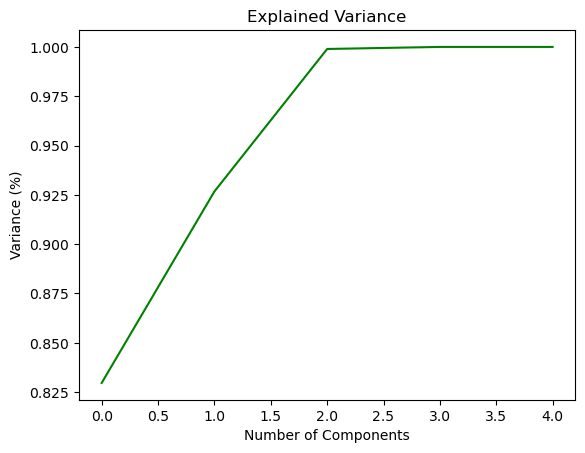

In [262]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

full_pca = PCA().fit(X_scaled) # We called "full_pca" because we still didn't reduce any feature.

plt.figure()
plt.plot(np.cumsum(full_pca.explained_variance_ratio_), color="green")

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

Selecting the optimal number of components

95% ensures that the majority of the variance (or information) in the data is captured while still achieving a meaningful reduction in the number of features. 

In [261]:
n_components = np.argmax(np.cumsum(full_pca.explained_variance_ratio_) >= 0.95) + 1 # Get the index of cumulative sum that has over 95% variance (information)
print(f"Number of components that explain 95% of the variance: {n_components}")

pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(X_scaled)
X_pca

Number of components that explain 95% of the variance: 3


array([[ 0.61658598, -0.13724664,  0.7390551 ],
       [ 0.61201522, -0.13189277,  0.74007118],
       [ 0.61521451, -0.13125609,  0.74592597],
       ...,
       [ 3.3256369 , -0.72726724, -0.32112375],
       [ 3.20578242, -0.55253696, -0.27875946],
       [ 3.07380233, -0.42032615, -0.19998994]])

# Data Preprocessing

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((691890, 3), (172973, 3), (691890, 1), (172973, 1))

# Models Selection

## Linear

Multiple Linear Regression

In [277]:
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
accuracy_score = linear_model.score(X_test, y_test)
accuracy_score, r2_score(linear_pred, y_test)

(0.9999071545311776, 0.9999059998435944)

Polynomial Linear Regression

In [281]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

poly_pred = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(poly_pred, y_test)
mse_poly

5.845713319592057e-05

Support Vector Machine Regression

In [283]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

svr_pred = svr_model.predict(X_test)
mse_svr = mean_squared_error(svr_pred, y_test)
mse_svr

C:\Users\USER\anaconda3\envs\JTorch\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0031800605976703604

## Non-Linear

Decision Tree Regression

In [284]:
dec_tree_model = DecisionTreeRegressor(random_state=42)
dec_tree_model.fit(X_train, y_train)

dec_tree_pred = dec_tree_model.predict(X_test)
mse_dec_tree = mean_squared_error(dec_tree_pred, y_test)
mse_dec_tree

5.162076788499197e-05

Random Forest Regression

In [287]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(rf_pred, y_test)
mse_rf

C:\Users\USER\anaconda3\envs\JTorch\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.8804197785272997e-05